In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('movies.csv')

In [9]:
df.head

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
df.shape

(62423, 3)

In [12]:
df.drop(['genres'],axis=1,inplace=True)

In [14]:
rating = pd.read_csv('ratings.csv')

In [16]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [21]:
rating = rating.loc[:,["userId", "movieId", "rating"]]
rating.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [22]:
df = pd.merge(df,rating)

In [23]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),2,3.5
1,1,Toy Story (1995),3,4.0
2,1,Toy Story (1995),4,3.0
3,1,Toy Story (1995),5,4.0
4,1,Toy Story (1995),8,4.0


In [24]:
df.shape

(25000095, 4)

In [25]:
df = df.iloc[:1000000]

In [26]:
df.shape

(1000000, 4)

In [28]:
df.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.000000
mean,51.039689,81132.064646,3.585333
std,40.255164,46911.787715,1.054285
min,1.000000,2.000000,0.500000
25%,18.000000,40437.750000,3.000000
50%,43.000000,80949.000000,4.000000
75%,85.000000,121624.000000,4.000000
max,145.000000,162541.000000,5.000000


# Data Visualization

In [29]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Usual Suspects, The (1995)                   4.284353
Taxi Driver (1976)                           4.083479
Seven (a.k.a. Se7en) (1995)                  4.079166
Persuasion (1995)                            4.030000
Braveheart (1995)                            4.002273
                                               ...   
NeverEnding Story III, The (1994)            2.318661
Lawnmower Man 2: Beyond Cyberspace (1996)    2.137698
Headless Body in Topless Bar (1995)          2.062500
Gospa (1995)                                 1.928571
Kids of the Round Table (1995)               1.915385
Name: rating, Length: 144, dtype: float64

In [30]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Braveheart (1995)                            59184
Toy Story (1995)                             57309
Usual Suspects, The (1995)                   55366
Seven (a.k.a. Se7en) (1995)                  50596
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    47054
                                             ...  
Sonic Outlaws (1995)                            31
Guardian Angel (1994)                           28
Nueba Yol (1995)                                20
Headless Body in Topless Bar (1995)             16
Gospa (1995)                                    14
Name: rating, Length: 144, dtype: int64

In [31]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                                         rating  number of ratings
title                                                             
Ace Ventura: When Nature Calls (1995)  2.642168              21552
Across the Sea of Time (1995)          2.993333                 75
American President, The (1995)         3.657171              17042
Angela (1995)                          3.226190                 42
Angels and Insects (1995)              3.526833               2441


In [32]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
"Usual Suspects, The (1995)",4.284353,55366
Taxi Driver (1976),4.083479,29133
Seven (a.k.a. Se7en) (1995),4.079166,50596
Persuasion (1995),4.030000,2950
Braveheart (1995),4.002273,59184
...,...,...
"NeverEnding Story III, The (1994)",2.318661,1329
Lawnmower Man 2: Beyond Cyberspace (1996),2.137698,2215
Headless Body in Topless Bar (1995),2.062500,16


In [33]:
ratings.describe()

,rating,number of ratings
count,144.000000,144.000000
mean,3.273825,6944.444444
std,0.465419,11476.605792
min,1.915385,14.000000
25%,3.042943,534.250000
50%,3.318055,2482.000000
75%,3.571229,7654.250000
max,4.284353,59184.000000


<function matplotlib.pyplot.show(close=None, block=None)>

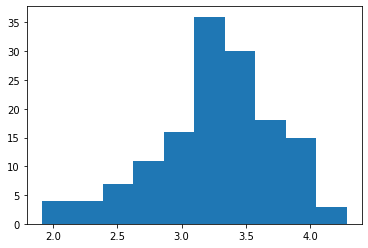

In [34]:
plt.hist(ratings['rating'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

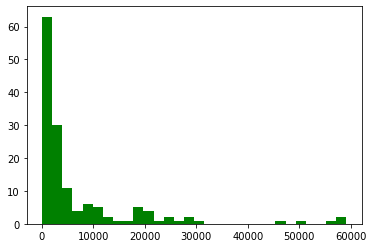

In [46]:
plt.hist(ratings['number of ratings'],bins=30,color='green')
plt.show

# Recommender System

In [48]:
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(5)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Bad Boys (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pivot_table.shape

(138544, 144)

In [50]:
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [51]:
recommend_movie('American President, The (1995)')

title
American President, The (1995)    1.000000
Sonic Outlaws (1995)              0.710412
Kids of the Round Table (1995)    0.501627
Sabrina (1995)                    0.421027
Nueba Yol (1995)                  0.415145
dtype: float64

In [52]:
recommend_movie('Toy Story (1995)')

title
Toy Story (1995)                 1.000000
Shadows (Cienie) (1988)          0.592258
Across the Sea of Time (1995)    0.488717
Angela (1995)                    0.476685
Guardian Angel (1994)            0.456041
dtype: float64

In [53]:
recommend_movie('Taxi Driver (1976)')

title
Taxi Driver (1976)       1.000000
Jupiter's Wife (1994)    0.643570
Target (1995)            0.414861
Catwalk (1996)           0.405732
Sonic Outlaws (1995)     0.378546
dtype: float64

# JOB DONE !!